In [ ]:
pip install plotly

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene, shapiro
import warnings

In [43]:
df = pd.read_csv("world_bank_development_indicators.csv")
df_inc = pd.read_excel("income.xlsx", sheet_name="List of economies")

In [44]:
df = df.merge(
    df_inc[["Economy", "Income group", "Region"]],
    how="left",
    left_on="country",
    right_on="Economy"
).drop(columns=["Economy"])

In [45]:
remove_terms = ["income", "total", "IDA", "IBRD", "dividend", "states"]
df = df[~df["country"].str.lower().str.contains("|".join(remove_terms))]


In [46]:
df = df.dropna(subset=["Income group"])


In [47]:
env_vars = ["CO2_emisions", "renewvable_energy_consumption%", 
            "forest_land%", "agricultural_land%"]

df[env_vars] = df[env_vars].apply(pd.to_numeric, errors="coerce")


In [48]:
display(df.head())
display(df.tail())
display(df.sample(7))


,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Income group,Region
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"


,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Income group,Region
17267,Zimbabwe,2019-01-01,41.876696,45.213002,386850.0,657.0,6.927164,-1.271190,0.133336,46.682095,...,31.518,8.043,61.292,15354608.0,10408889.0,-1.163669,0.117815,5.145035,Lower middle income,Sub-Saharan Africa
17268,Zimbabwe,2020-01-01,41.876696,45.093912,386850.0,657.0,5.118949,-1.287992,0.140076,52.747667,...,31.009,8.132,61.124,15669666.0,10617452.0,-1.113408,0.120230,4.977770,Lower middle income,Sub-Saharan Africa
17269,Zimbabwe,2021-01-01,41.876696,44.974822,386850.0,NaN,NaN,-1.253550,0.151591,48.979927,...,30.537,9.057,59.253,15993524.0,10827136.0,-1.135830,0.120300,6.139985,Lower middle income,Sub-Saharan Africa
17270,Zimbabwe,2022-01-01,NaN,NaN,NaN,NaN,NaN,-1.255139,0.151262,NaN,...,NaN,NaN,NaN,16320537.0,11033499.0,-1.102206,0.119338,NaN,Lower middle income,Sub-Saharan Africa
17271,Zimbabwe,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower middle income,Sub-Saharan Africa


,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Income group,Region
10624,Moldova,1997-01-01,77.642770,10.288578,32920.0,450.0,18.652583,NaN,NaN,100.000000,...,13.123,13.511,65.172000,2936413.0,1591624.0,NaN,NaN,9.422390,Upper middle income,Europe & Central Asia
7558,Isle of Man,2001-01-01,77.543860,6.070175,570.0,NaN,NaN,NaN,NaN,100.000000,...,11.755,12.239,75.510000,76398.0,36799.0,NaN,NaN,NaN,High income,Europe & Central Asia
906,Austria,1970-01-01,40.424140,NaN,82520.0,1110.0,NaN,NaN,NaN,NaN,...,15.000,13.200,69.914634,7467086.0,2594215.0,NaN,NaN,NaN,High income,Europe & Central Asia
931,Austria,1995-01-01,36.125788,46.133119,82520.0,1110.0,NaN,NaN,NaN,100.000000,...,11.200,10.200,76.668293,7948278.0,3052457.0,NaN,NaN,0.981466,High income,Europe & Central Asia
6158,Guam,2009-01-01,33.333333,44.444444,540.0,NaN,NaN,0.832616,0.426269,100.000000,...,21.335,4.784,77.094000,164580.0,9862.0,0.963812,0.500100,3.038036,High income,East Asia & Pacific
2930,Chile,2010-01-01,19.678268,22.494338,743532.0,1522.0,10.765081,1.441627,0.162827,99.525894,...,14.327,5.962,78.501000,17004162.0,2197958.0,1.095646,0.127296,3.181574,High income,Latin America & Caribbean
5598,"Gambia, The",1961-01-01,51.778656,NaN,10120.0,836.0,NaN,NaN,NaN,NaN,...,50.605,28.500,35.568000,410801.0,360145.0,NaN,NaN,NaN,Low income,Sub-Saharan Africa


In [49]:
print(df.dtypes)


country                                       object
date                                          object
agricultural_land%                           float64
forest_land%                                 float64
land_area                                    float64
avg_precipitation                            float64
trade_in_services%                           float64
control_of_corruption_estimate               float64
control_of_corruption_std                    float64
access_to_electricity%                       float64
renewvable_energy_consumption%               float64
electric_power_consumption                   float64
CO2_emisions                                 float64
other_greenhouse_emisions                    float64
population_density                           float64
inflation_annual%                            float64
real_interest_rate                           float64
risk_premium_on_lending                      float64
research_and_development_expenditure%        f

In [50]:
df.isna().sum().sort_values(ascending=False)


doing_business                               13099
time_to_get_operation_license                12968
multidimensional_poverty_headcount_ratio%    12846
human_capital_index                          12697
logistic_performance_index                   12258
statistical_performance_indicators           12097
central_goverment_debt%                      11504
gini_index                                   11281
research_and_development_expenditure%        11120
risk_premium_on_lending                      11015
government_health_expenditure%                9496
intentional_homicides                         9467
expense%                                      9326
tax_revenue%                                  9136
real_interest_rate                            9054
goverment_effectiveness_estimate              8736
goverment_effectiveness_std                   8736
regulatory_quality_std                        8734
regulatory_quality_estimate                   8734
control_of_corruption_estimate 

In [51]:
df.describe()
df.select_dtypes("object").describe()


,country,date,Income group,Region
count,13279,13279,13279,13279
unique,208,64,4,7
top,Afghanistan,1992-01-01,High income,Europe & Central Asia
freq,64,208,5312,3648


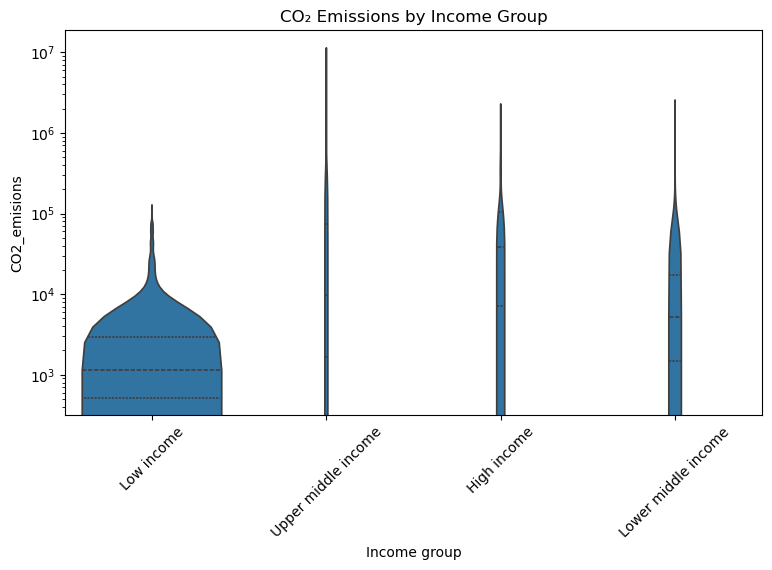

In [52]:
plt.figure(figsize=(9,5))
sns.violinplot(data=df, x="Income group", y="CO2_emisions", inner="quartile")
plt.yscale("log")
plt.title("CO₂ Emissions by Income Group")
plt.xticks(rotation=45)
plt.show()


In [77]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
plt.figure(figsize=(9,5))
sns.swarmplot(data=df, x="Income group", y="renewvable_energy_consumption%", size=3)
plt.title("Renewable Energy Use by Income Group")
plt.xticks(rotation=45)
plt.show()


C:\Users\onkar\anaconda3\envs\asda-work\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\onkar\anaconda3\envs\asda-work\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\onkar\anaconda3\envs\asda-work\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\onkar\anaconda3\envs\asda-work\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\onkar\anaconda3\envs\asda-work\Lib\s

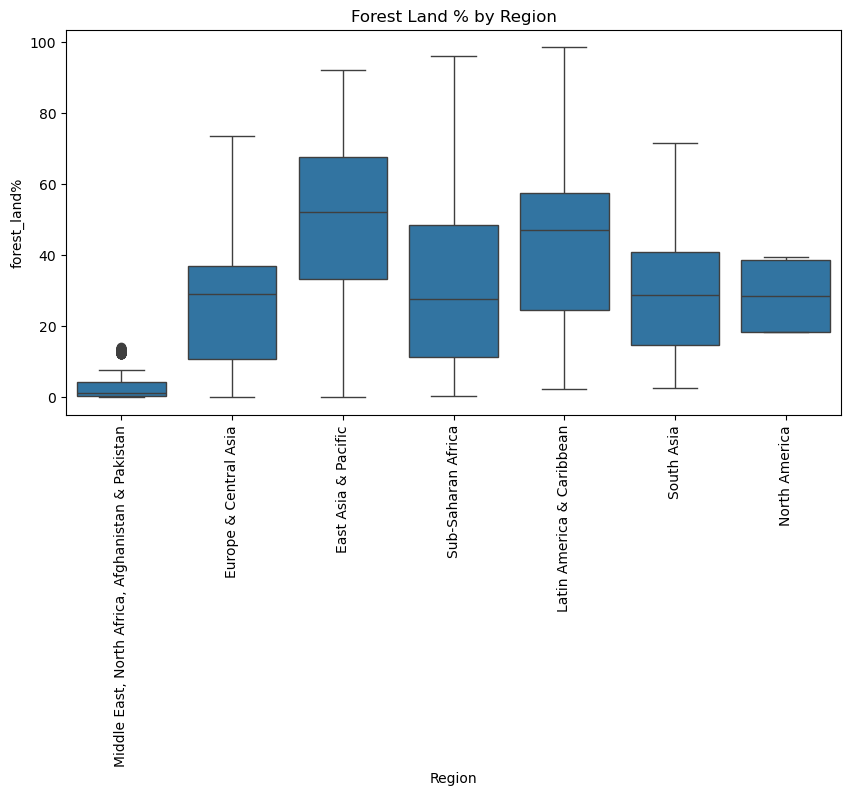

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Region", y="forest_land%")
plt.xticks(rotation=90)
plt.title("Forest Land % by Region")
plt.show()


In [55]:
df_avg = df.groupby(["country", "Income group", "Region"], as_index=False)[env_vars].mean()


In [56]:
data = df_avg[["CO2_emisions", "Income group"]].dropna()


In [57]:
groups = [grp["CO2_emisions"].values for name, grp in data.groupby("Income group")]
print("Levene p:", levene(*groups).pvalue)


Levene p: 0.36515674340137627


In [58]:
print([shapiro(g)[1] for g in groups])


[np.float64(1.282080924568545e-12), np.float64(3.004243741447827e-08), np.float64(3.7037160573399363e-14), np.float64(2.6374621041179873e-15)]


In [59]:
data["log_CO2"] = np.log1p(data["CO2_emisions"])


In [60]:
model = ols('log_CO2 ~ C(Q("Income group"))', data=data).fit()
anova_results = anova_lm(model, typ=2)
print(anova_results)


                          sum_sq     df         F    PR(>F)
C(Q("Income group"))  141.066513    3.0  8.618061  0.000023
Residual              976.666116  179.0       NaN       NaN


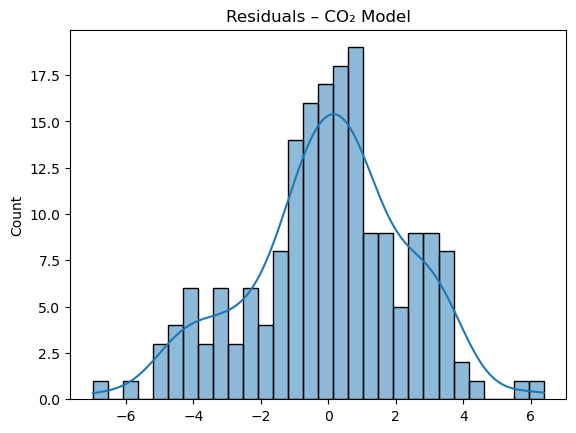

In [61]:
sns.histplot(model.resid, bins=30, kde=True)
plt.title("Residuals – CO₂ Model")
plt.show()


In [62]:
tukey = pairwise_tukeyhsd(data["log_CO2"], data["Income group"])
print(tukey)


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
        High income          Low income  -2.6639    0.0 -4.1236 -1.2043   True
        High income Lower middle income  -1.5266 0.0055 -2.7095 -0.3437   True
        High income Upper middle income  -0.8653 0.2061 -2.0087   0.278  False
         Low income Lower middle income   1.1373 0.2177  -0.388  2.6627  False
         Low income Upper middle income   1.7986 0.0112  0.3037  3.2935   True
Lower middle income Upper middle income   0.6613 0.5019 -0.5649  1.8874  False
------------------------------------------------------------------------------


In [63]:
var = "renewvable_energy_consumption%"
data_r = df_avg[[var, "Income group"]].dropna()

model_r = ols(f'Q("{var}") ~ C(Q("Income group"))', data=data_r).fit()
print(anova_lm(model_r, typ=2))


                            sum_sq     df          F        PR(>F)
C(Q("Income group"))  87274.378635    3.0  64.270285  4.633042e-29
Residual              89623.205441  198.0        NaN           NaN


In [64]:
var = "forest_land%"
data_f = df_avg[[var, "Income group"]].dropna()

model_f = ols(f'Q("{var}") ~ C(Q("Income group"))', data=data_f).fit()
print(anova_lm(model_f, typ=2))


                             sum_sq     df         F    PR(>F)
C(Q("Income group"))    2045.059525    3.0  1.091512  0.353798
Residual              124906.820497  200.0       NaN       NaN


In [65]:
var = "agricultural_land%"
data_a = df_avg[[var, "Income group"]].dropna()

model_a = ols(f'Q("{var}") ~ C(Q("Income group"))', data=data_a).fit()
print(anova_lm(model_a, typ=2))


                            sum_sq     df         F    PR(>F)
C(Q("Income group"))   4150.866065    3.0  2.933396  0.034621
Residual              92920.822139  197.0       NaN       NaN


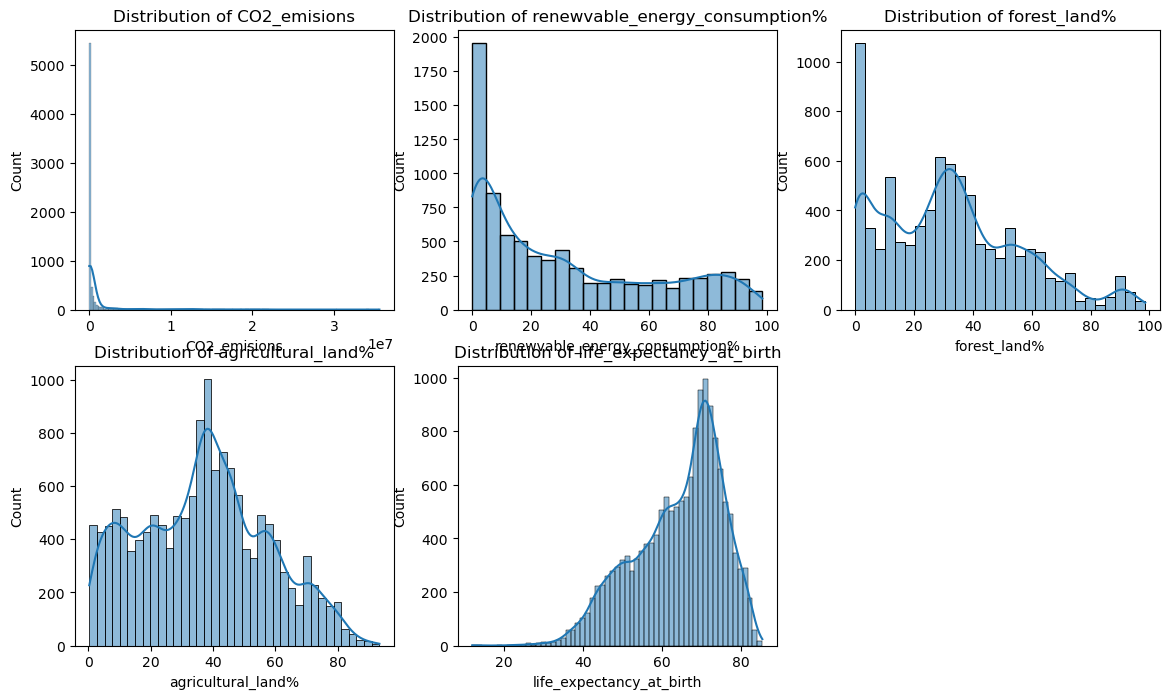

In [73]:
indicators = [
    'CO2_emisions', 
    'renewvable_energy_consumption%', 
    'forest_land%', 
    'agricultural_land%', 
    'life_expectancy_at_birth'
]

plt.figure(figsize=(14, 8))

for i, col in enumerate(indicators, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_wbdi[col], kde=True)
    plt.title(f'Distribution of {col}')


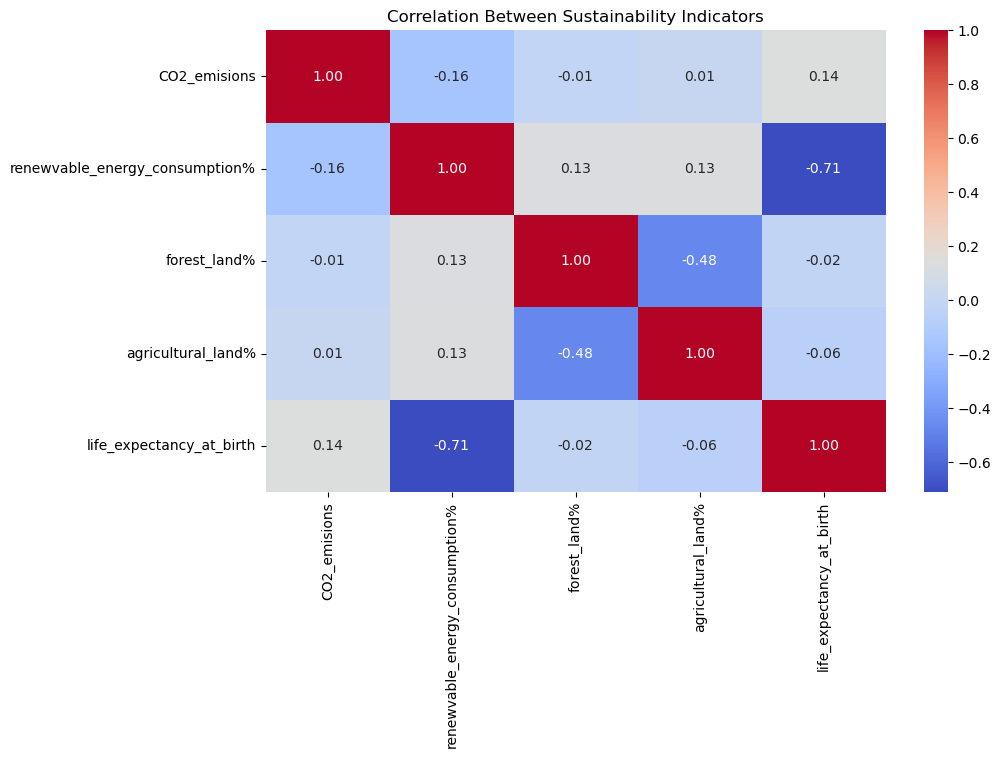

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_wbdi[indicators].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Sustainability Indicators")
plt.show()
